# Lecture 13 (4/25/22)

**Announcements**
- Pset 3 due this Wednesday, 4/27


*Last time we covered:*
- Data cleaning, organizing, and transforming

**Today's agenda:**
- Linear regression overview


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linear regression

Briefly, linear regression is a way of describing a linear relationship between two (continuous) variables.


## What does it do for us?

- **Predict** unknown values of $y$ based on unseen values of $x$
- **Quantify** the strength and direction of the relationship between $y$ and $x$

*To understand this better, let's look at an example.*

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68


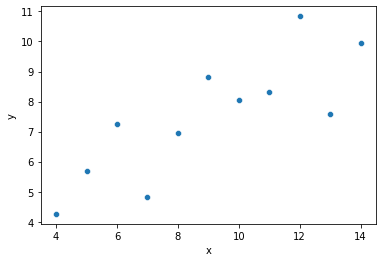

In [2]:
ans = sns.load_dataset('anscombe')
dat = ans[ans['dataset'] == "I"]
print(dat)

sns.scatterplot(data = dat, x = "x", y = "y")
plt.show()


Looking at the graph above, it seems like we can do a decent job predicting $y$ if we know $x$!

## How can we describe the relationship between $y$ and $x$ here?

1. "Larger $y$ values lead to larger $x$ values"
2. "The *covariance* between $x$ and $y$ is 5.5" => will change with values of $x$ and $y$
2. "The *correlation* between $x$ and $y$ is 0.8" => does not tell us about *slope*
3. "Every time $x$ increases by 1, $y$ increases by about 0.5" => requires estimating a slope value

   x1  y1  x2  y2
0   1   1   4   4
1   2   2   6   6
2   3   3   8   8
Covariance between x and y1: [[1. 1.]
 [1. 1.]]
Covariance between x and y2: [[4. 4.]
 [4. 4.]]


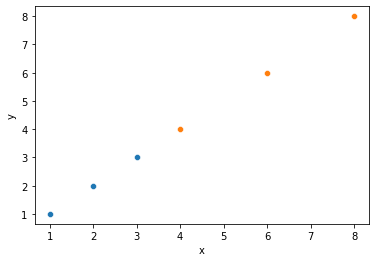

In [3]:
# Quick illustration of 2 above: same relationship, different covariance

covdat = pd.DataFrame({"x1": [1, 2, 3],
                       "y1": [1, 2, 3],
                       "x2": [4, 6, 8],
                       "y2": [4, 6, 8]
                   })

sns.scatterplot(x = covdat.x1, y = covdat.y1)
sns.scatterplot(x = covdat.x2, y = covdat.y2)
plt.xlabel("x")
plt.ylabel("y")

print(covdat)
print("Covariance between x and y1: {}".format(np.cov(covdat.x1, covdat.y1)))
print("Covariance between x and y2: {}".format(np.cov(covdat.x2, covdat.y2)))


   x  y1  y2
0  1   4   2
1  2   5   4
2  3   6   6
Correlation between x and y1: [[1. 1.]
 [1. 1.]]
Correlation between x and y2: [[1. 1.]
 [1. 1.]]


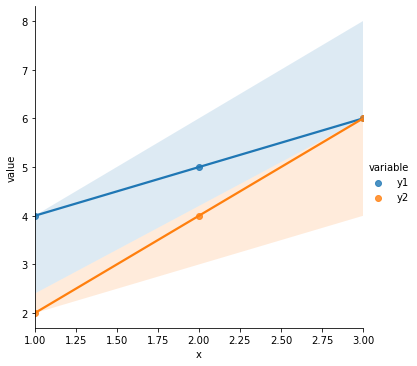

In [4]:
# Quick illustration of 3 above: same correlation, very different relationship

cordat = pd.DataFrame({"x": [1, 2, 3],
                    "y1": [4, 5, 6],
                    "y2": [2, 4, 6]
                   })
cordat_l = cordat.melt(id_vars = "x")

print(cordat)
print("Correlation between x and y1: {}".format(np.corrcoef(cordat.x, cordat.y1)))
print("Correlation between x and y2: {}".format(np.corrcoef(cordat.x, cordat.y2)))

sns.lmplot(data = cordat_l, x = "x", y = "value", hue = "variable")
plt.show()


So to describe the relationship between $x$ and $y$ in our original data in a way that is consistent for data that show a similar relationship (ex. 1 above) and distinct for data that have a different relationship (ex. 2 above), we want to know the *slope of the best line through the points*.

This tells us about how these variables are related and lets us predict $y$ from values of $x$ that we haven't seen before.

## So how do we find the *best* slope estimate?

Our goal is to quantify how changes in $x$ lead to changes in $y$. 

But lots of different lines can be drawn through our data. 

*How do we decide?*

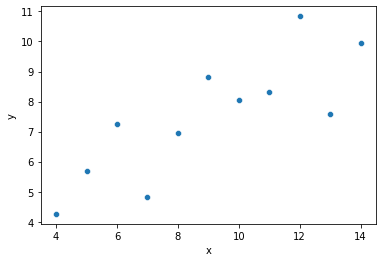

In [5]:
# Our original data
sns.scatterplot(data = dat, x = "x", y = "y")
plt.show()

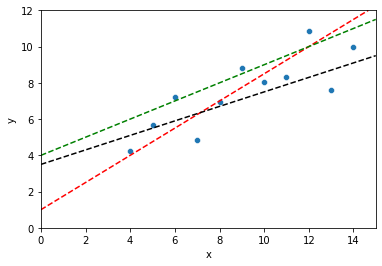

In [6]:
# Which of these lines is best? Why?
sns.scatterplot(data = dat, x = "x", y = "y")
plt.axline(xy1 = (0, 1), slope = .75, color = "r", linestyle = "--")
plt.axline(xy1 = (0, 4), slope = .5, color = "g", linestyle = "--")
plt.axline(xy1 = (0, 3.5), slope = .4, color = "k", linestyle = "--")
plt.xlim(0, 15)
plt.ylim(0, 12)
plt.show()

## Linear regression: choose the line that *minimizes the sum of the squared errors*

This isn't the only solution, but it's a pretty good one for many situations. But what does this mean? 

First, we can describe each possible line through our data as having an *intercept* $\beta_0$ and a *slope* $\beta_1$.

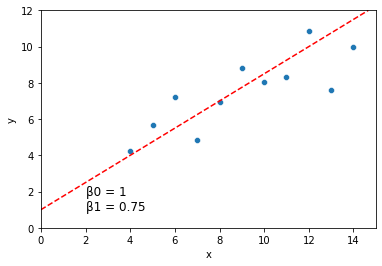

In [7]:
sns.scatterplot(data = dat, x = "x", y = "y")
plt.axline(xy1 = (0, 1), slope = .75, color = "r", linestyle = "--")
plt.xlim(0, 15)
plt.ylim(0, 12)

plt.text(2, 1, "\u03B20 = 1 \n\u03B21 = 0.75", fontsize = 12)
plt.show()

How well does a line like the one above describe the relationship between $x$ and $y$?

For a line describing our data with intercept $\beta_0$ and slope $\beta_1$, we can quantify how well each of our data points $(x_i, y_i)$ is predicted by this line:

$y_i = \beta_0 + \beta_1*x_i + \epsilon_i$

The $\epsilon_i$ term here is the *error* term. If this value is 0 for a given data point, it means our line captures that data point perfectly. If it's large (positive or negative), our line is doing a bad job predicting our data at that location.


![reg_error](img/reg_error.png)

Other lines will have different error spread across our data points:

![reg_error2](img/reg_error2.png)

Now, the idea is that if we choose $\beta_0$ and $\beta_1$ to minimize the error $\epsilon_i$ across our data, we'll have a pretty good line. 

What does this look like in our actual data? 

Let's fill in the predictions and the error for $\beta_0 = 1$ and $\beta_1 = 0.75$.

In [8]:
dat

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


What is the predicted $y$ value for the $\beta_0$ and $\beta_1$ values above?

In [9]:
beta0 = 1.0
beta1 = 0.75

dat = dat.assign(y_pred = beta0 + beta1 * dat.x)

dat

# Is it clear what y_pred represents here?

,dataset,x,y,y_pred
0,I,10.0,8.04,8.50
1,I,8.0,6.95,7.00
2,I,13.0,7.58,10.75
3,I,9.0,8.81,7.75
4,I,11.0,8.33,9.25
5,I,14.0,9.96,11.50
6,I,6.0,7.24,5.50
7,I,4.0,4.26,4.00
8,I,12.0,10.84,10.00
9,I,7.0,4.82,6.25


So what's our error $\epsilon_i$?

In [10]:
dat = dat.assign(error = dat.y - dat.y_pred)

dat

# What does our error look like?

,dataset,x,y,y_pred,error
0,I,10.0,8.04,8.50,-0.46
1,I,8.0,6.95,7.00,-0.05
2,I,13.0,7.58,10.75,-3.17
3,I,9.0,8.81,7.75,1.06
4,I,11.0,8.33,9.25,-0.92
5,I,14.0,9.96,11.50,-1.54
6,I,6.0,7.24,5.50,1.74
7,I,4.0,4.26,4.00,0.26
8,I,12.0,10.84,10.00,0.84
9,I,7.0,4.82,6.25,-1.43


So now we have our error for $\beta_0$ = 1 and $\beta_1$ = 0.75. 

How do we combine these values to compare them to other possible $\beta_0$ and $\beta_1$ fits?
- Add up the error values? 
- Take the average? 

Can you think of any problems with the above?

Sum of the error values: -2.7399999999999993
Mean of the error values: -0.24909090909090903


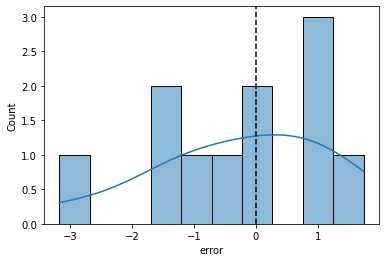

In [11]:
sns.histplot(data = dat, x = "error", bins = 10, kde = True)
plt.axvline(0, color = "k", linestyle = "--")

print("Sum of the error values: {}".format(dat['error'].sum()))
# positive and negative error values cancel each other out

print("Mean of the error values: {}".format(dat['error'].mean()))
# how do we compare negative and positive average error?

**Linear regression**: evaluate $\beta_0$ and $\beta_1$ using sum of squared error
- Square each error value $\epsilon_i$ so that positive and negative error both contribute equally to our parameter estimates
- Then sum up the squared error across all our data points $(x_i, y_i)$

We'll call this our **sum of squared error (SSE)**.

$ SSE = \sum_{i=1}^{n} {\epsilon_i}^2 $

Now, our best-fitting line is parameterized by the $\beta_0$ and $\beta_1$ values that *minimize sum of squared error*.

$ \hat{\beta_0} = \arg \min_{\beta_0} \sum_{i=1}^{n} {\epsilon_i}^2 = \arg \min_{\beta_0} SSE $

$ \hat{\beta_1} = \arg \min_{\beta_1} \sum_{i=1}^{n} {\epsilon_i}^2 = \arg \min_{\beta_1} SSE $

This is often called *ordinary least squares (OLS)* regression.

**Calculating sum of squared error**

Let's calculate SSE for our sample $\beta_0$ = 1 and $\beta_1$ = 0.75 parameter values above.

In [12]:
# Square the error term for each datapoint (xi, yi)
dat = dat.assign(sq_error = dat.error**2)

dat

,dataset,x,y,y_pred,error,sq_error
0,I,10.0,8.04,8.50,-0.46,0.2116
1,I,8.0,6.95,7.00,-0.05,0.0025
2,I,13.0,7.58,10.75,-3.17,10.0489
3,I,9.0,8.81,7.75,1.06,1.1236
4,I,11.0,8.33,9.25,-0.92,0.8464
5,I,14.0,9.96,11.50,-1.54,2.3716
6,I,6.0,7.24,5.50,1.74,3.0276
7,I,4.0,4.26,4.00,0.26,0.0676
8,I,12.0,10.84,10.00,0.84,0.7056
9,I,7.0,4.82,6.25,-1.43,2.0449


In [13]:
# Calculate the sum of the squared error values
sum_sq_error = dat.sq_error.sum()
sum_sq_error

21.315199999999997

Your turn! See if you can identify a pair of values $\beta_0$ and $\beta_1$ that have a *lower* SSE than the value above.

In [14]:
### CODE HERE ###




We just calculated SSE for sample $\beta_0$ and $\beta_1$ values, but how do we find the values that are guaranteed to have the lowest SSE?

## How do we find our optimal linear regression parameters?

As we'll see throughout this quarter, fitting parameters in a model often involves finding values that *minimize a particular loss function* (in this case, SSE). 

There are a lot of techniques for doing this. Optimization is largely focused on comparing and evaluating these techniques.  

**Option 1**: Search the parameter space ourselves!

Let's illustrate a simple one to get an intuition for it: a basic *grid search*. 

In [15]:
best_beta0 = -np.inf 
best_beta1 = -np.inf
min_sse = np.inf

def sse(b0, b1, data):
    return np.sum((data.y - (b0 + b1 * data.x))**2)

# Test the above!
sse(b0 = 1, b1 = 0.75, data = dat)

# Find our best fitting b0 and b1 values by searching over a reasonable range
# Takes ~30s to run
for b0 in np.arange(start = -10, stop = 10, step = 0.1): # what beta_0 values do we want to consider?
    for b1 in np.arange(start = -10, stop = 10, step = 0.1): # what beta_1 values do we want to consider?
        sse_tmp = sse(b0, b1, dat)
        if sse_tmp < min_sse:
            best_beta0 = b0
            best_beta1 = b1
            min_sse = sse_tmp
            
print("Best fits by grid search: beta0 = {}, beta1 = {}".format(best_beta0, best_beta1))
        

Best fits by grid search: beta0 = 2.999999999999954, beta1 = 0.4999999999999627


*How did we do?*

Let's graph our original data with the solution above:

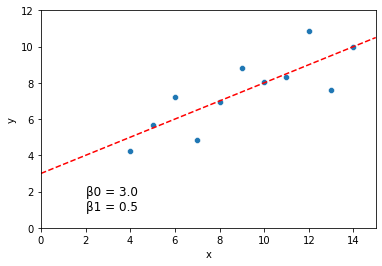

In [16]:
sns.scatterplot(data = dat, x = "x", y = "y")
plt.axline(xy1 = (0, best_beta0), slope = best_beta1, color = "r", linestyle = "--")
plt.xlim(0, 15)
plt.ylim(0, 12)

plt.text(2, 1, "\u03B20 = {} \n\u03B21 = {}".format(round(best_beta0, 3), round(best_beta1, 3)), fontsize = 12)
plt.show()

This is a pretty good guess. But it's slow, not as precise, and required us to specify ahead of time what range we thought the values would take on.

In other settings, we can do better by trying out values which are closer and closer to the best fitting value, rather than just trying everything in a range.


**Option 2:** Solve for $\beta_0$ and $\beta_1$

For linear regression, it turns out that the best fitting solution can be specified *analytically*: we know ahead of time what the best fitting parameter values will be!

$ \hat{\beta} = ({X^T}X)^{-1}{X^T}y $

Why does this solution exist every time? Beyond the scope of this lecture but take a look at the resources at the bottom if you're curious :) 

For now, let's just see what values we get when we solve our original regression analytically using the solution above:

In [17]:
from numpy.linalg import inv

y = np.array(dat['y'])
y = y.reshape(len(dat['y']), 1)
b0 = np.ones((len(dat.x), 1))
b1 = np.array(dat['x'])
b1 = b1.reshape((len(dat['x']), 1))

X = np.concatenate((b0, b1), axis = 1)

betas = inv(X.T.dot(X)).dot(X.T).dot(y)
betas

array([[3.00009091],
       [0.50009091]])

This is the *true* minimum, pretty close to what we found in our basic grid search!

Fortunately, when doing regression with actual data, we don't need to do the grid search *or* the linear algebra solution by hand! 

**Option 3:** Fit a model with python tools

Here's a solution using the *scikit learn LinearRegression* [library](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [18]:
# Import the LinearRegression model from scikit learn
from sklearn.linear_model import LinearRegression

# Initialize our model
model = LinearRegression() # note you can pass in add'l arguments at initialization here

# Fit the model to our data
model.fit(X = b1, y = y) # note: it expects numpy arrays formatted the way we set them up above!

# Output the model parameter fits
print("Model fits: intercept = {}, slope = {}".format(model.intercept_, model.coef_))


Model fits: intercept = [3.00009091], slope = [[0.50009091]]


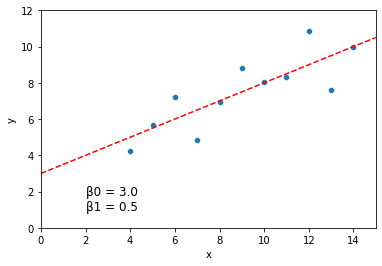

In [19]:
sns.scatterplot(data = dat, x = "x", y = "y")
plt.axline(xy1 = (0, model.intercept_[0]), slope = model.coef_[0][0], color = "r", linestyle = "--")
plt.xlim(0, 15)
plt.ylim(0, 12)

plt.text(2, 1, "\u03B20 = {} \n\u03B21 = {}".format(round(model.intercept_[0], 3), round(model.coef_[0][0], 3)), fontsize = 12)
plt.show()

For linear regression, there are several other common python libraries available which will all produce fairly similar outputs.

You don't need to learn all of them as long as you find one you're comfortable with!

- Numpy [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
- Statsmodels [OLS](https://www.statsmodels.org/dev/index.html)

In [20]:
# Numpy polyfit
np.polyfit(dat.x, dat.y, 1)


array([0.50009091, 3.00009091])

In [21]:
# Statsmodels
import statsmodels.formula.api as smf
results = smf.ols('y ~ x', data = dat).fit()
results.summary()

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Tue, 14 Jun 2022   Prob (F-statistic):            0.00217
Time:                        18:22:07   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   3.212
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Resources

There are lots of awesome resources out there to make sense of ordinary least squares regression. If you'd like to get a better handle on the stuff we discussed today, or if you want to dig deeper on the math (it's neat!), take a look at some of these pages:
- [This](https://setosa.io/ev/ordinary-least-squares-regression/) page lets you play around with values to see how OLS works
- [This](https://towardsdatascience.com/understanding-the-ols-method-for-simple-linear-regression-e0a4e8f692cc) page shows how the analytic solution relates to correlation and covariation
- [This](https://towardsdatascience.com/building-linear-regression-least-squares-with-linear-algebra-2adf071dd5dd) page walks through the linear algebra underlying the analytic solution